In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv(
    '../Data_Cleaning_Practice/data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)
df

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


<AxesSubplot: xlabel='Timestamp'>

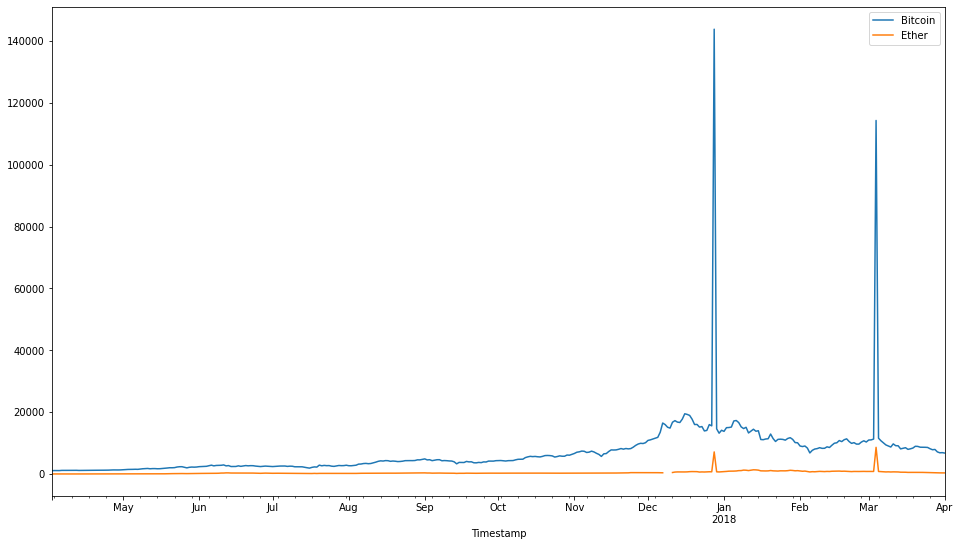

In [5]:
# through this simple plotting we see 2 huge spikes that appear to be outliers and then also some missing data from the ether prices.
df.plot(figsize=(16,9))

<AxesSubplot: xlabel='Timestamp'>

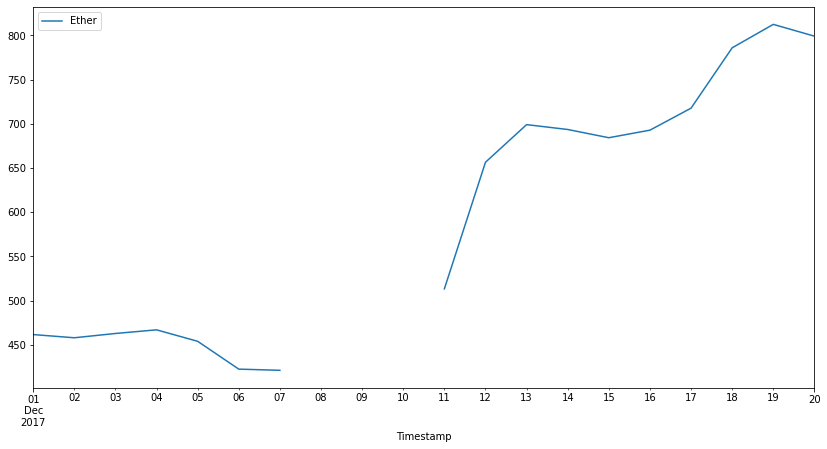

In [7]:
# we can slice out the dates around where we see the empty data to look at it closer to double check
df.loc['2017-12-1': '2017-12-20'].plot(y='Ether', figsize=(14, 7))

In [10]:
# now we should see if the values here are null or something else
df_na = df.loc['2017-12-1': '2017-12-15']
df_na['Ether'].isna().values.any()

True

With this true value we know that the values that are missing from this data are in fact null values.

In [11]:
# this will return the locations where there is a null value between the dates 2017-12-1 and 2017-12-15
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [12]:
# this will add some context around the null values
df.loc['2017-12-05': '2017-12-13']

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52
2017-12-13,16808.366667,699.09


With these null values we face the decision of needing to decide how to fill them in or remove them. Removing them does not really feel like the right option as this is the price overtime so having no values for days is strange. What we can do is fill in the data and assume that the price stayed the same as this will get as around the correct values for this time period. I will elect to use front fill unlike the example project of back fill, as I think it makes more sense that the price would be around then for longer. 

In [13]:
df.fillna(method='ffill', inplace=True)

<AxesSubplot: xlabel='Timestamp'>

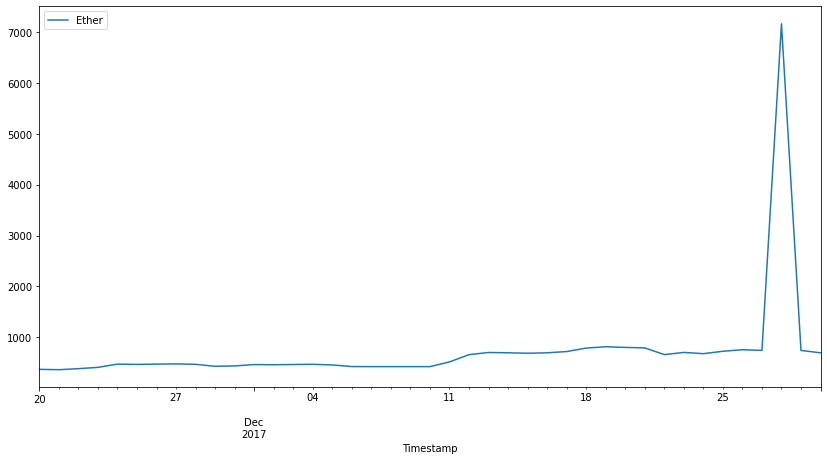

In [14]:
df.loc['2017-11-20': '2017-12-30'].plot(y='Ether', figsize=(14, 7))

This chart is looking much better now, to look at the outliers:

<AxesSubplot: xlabel='Timestamp'>

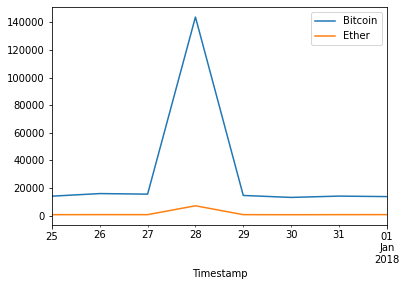

In [15]:
df['2017-12-25':'2018-01-01'].plot()

<AxesSubplot: xlabel='Timestamp'>

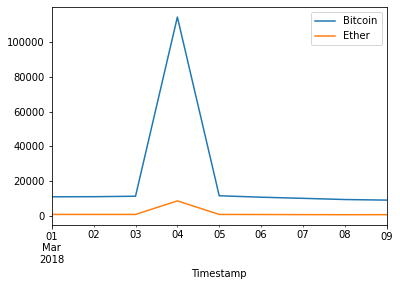

In [16]:
df['2018-03-01': '2018-03-09'].plot()

In [17]:
# we have found the location for the 2 outliers and so we are now able to drop them from the table to make our data cleaner
df_clean = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

<AxesSubplot: xlabel='Timestamp'>

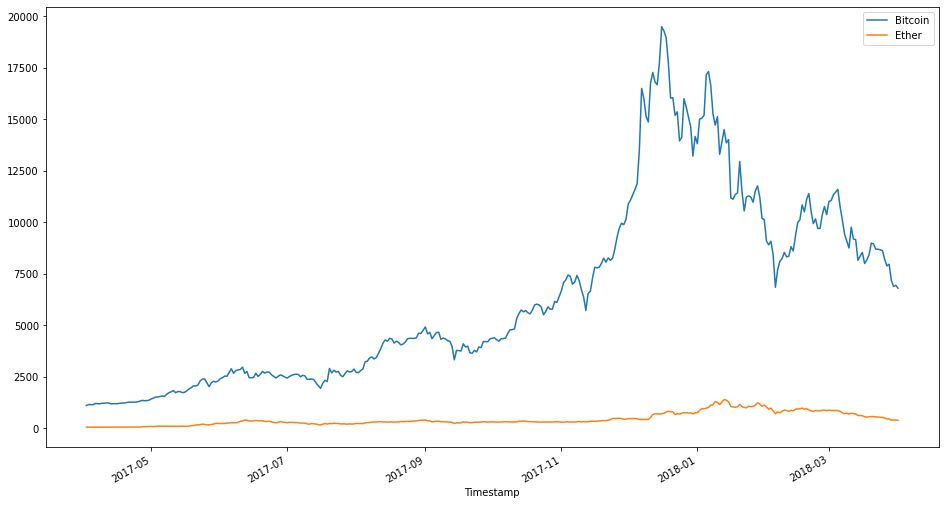

In [18]:
df_clean.plot(figsize=(16,9))

This is a much nicer graph that is able to show the overall data of the price for the 2 currencies over time.

Next looking at analytical methods to demonstrate our data set.

In [19]:
df.mean()
# note how the mean is larger due to the outliers from the uncleaned dataset

Bitcoin    6996.004022
Ether       468.851753
dtype: float64

In [20]:
df_clean.mean()

Bitcoin    6323.509186
Ether       427.866915
dtype: float64

In [22]:
df_clean.median()

Bitcoin    4580.38748
Ether       309.32000
dtype: float64

<AxesSubplot: ylabel='Frequency'>

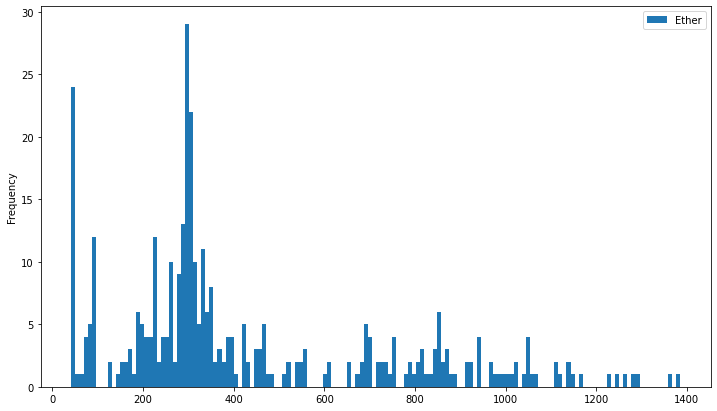

In [25]:
# a histogram will help us see the distribution of the overall dataset, bins is the number of divisions we want the dataset to be displayed in
df_clean.plot(kind='hist', y='Ether', bins=150, figsize=(12,7))

<AxesSubplot: ylabel='Frequency'>

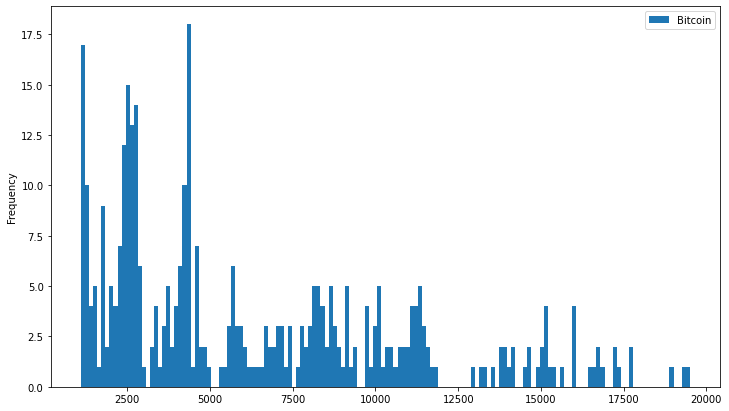

In [27]:
df_clean.plot(kind='hist', y='Bitcoin', bins=150, figsize=(12,7))

<AxesSubplot: xlabel='Ether', ylabel='Count'>

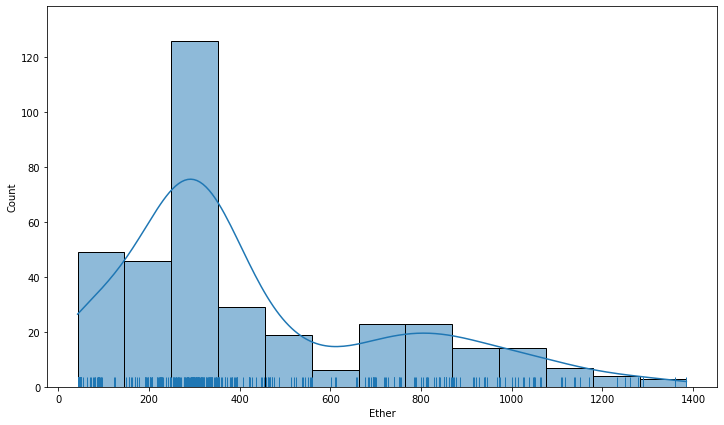

In [39]:
# this uses seaborn to create a historgram with a KDE and a rug plot in a graph for the Ether column
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(df_clean['Ether'], ax=ax, kde=True)
sns.rugplot(df_clean['Ether'], ax=ax)

<AxesSubplot: xlabel='Bitcoin', ylabel='Count'>

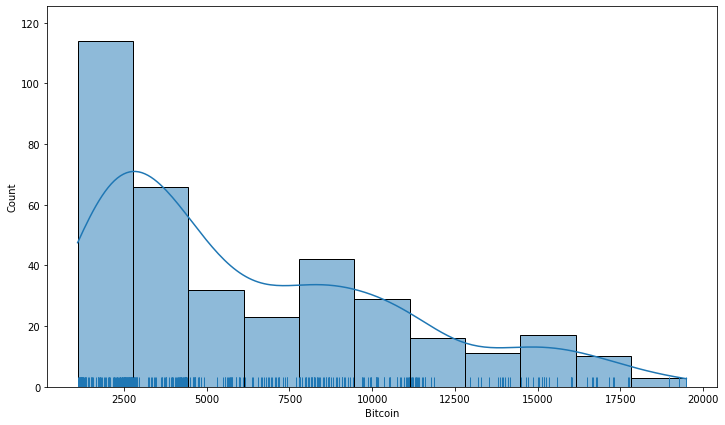

In [40]:
# this uses seaborn to create a historgram with a KDE and a rug plot in a graph for the bitcoin column
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(df_clean['Bitcoin'], ax=ax, kde=True)
sns.rugplot(df_clean['Bitcoin'], ax=ax)

Note in the example project they use distplot in seaborn which is now a deprecated method. This replicates the charts with the recommended methods now after the changes made.

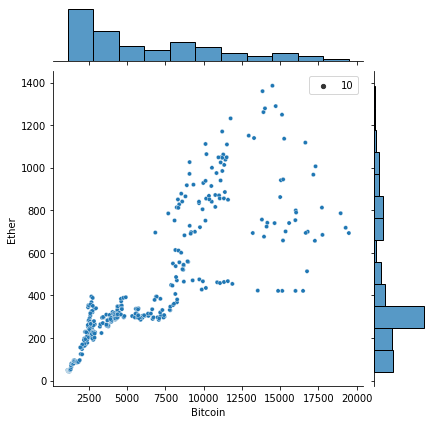

In [51]:
# this joins the histograms and creates a scatterplot for the data
sns.jointplot(x="Bitcoin", y="Ether", data=df_clean, size=10)

<AxesSubplot: xlabel='Bitcoin', ylabel='Ether'>

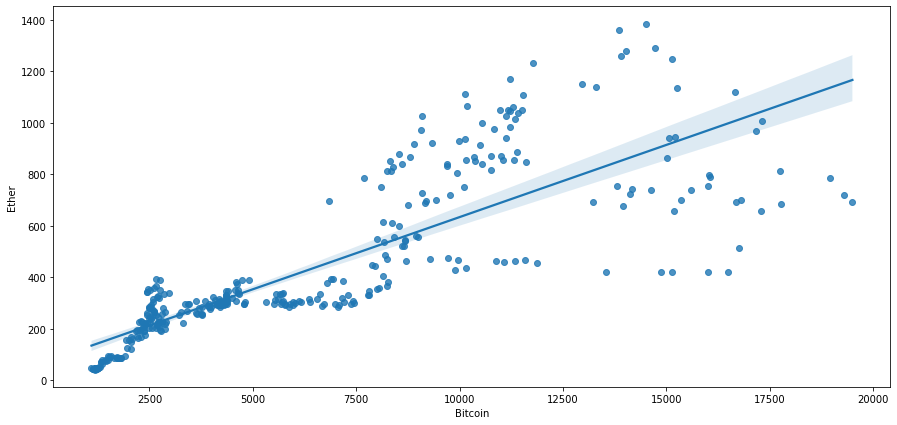

In [52]:
# here we will have just the scatterplot with a regular expression line for the dataset
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_clean, ax=ax)